In [1]:
#Import libraries

import ee 
import geemap
import xee
import xarray as xr
import datetime
import rioxarray as rxr
import os
import ipyleaflet
import gdown
import rasterio
from rasterio import features
from osgeo import gdal, ogr, osr
import os, glob, re, csv
from pathlib import Path

import numpy as np
import pandas as pd
import xarray as xr
import json
import geopandas as gpd
from IPython.display import HTML
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import animation, colors, rc
from matplotlib.animation import FuncAnimation
import matplotlib.dates as mdates

In [40]:
#Inputs:
pf = "14_387" #manually input, since GEE index differently!

cwd = os.getcwd()
json_path = os.path.join(cwd, "dict.json")

with open(json_path, "r") as file:
    loaded_sar_data = json.load(file)

path = int(next(iter(loaded_sar_data['1']['path_frame_dict'])))
frame = int(loaded_sar_data['1']['path_frame_dict'][str(path)][0])
#print(path, frame)
out_nc_fn = loaded_sar_data['1']['cube_fn']
filename = os.path.basename(out_nc_fn)   
rgi_id = filename.split("_")[1].split(".")[0]

rgi_ids = ['01-06031', '01-06046', '01-05959', '01-05740'] 
tifs_path = os.path.join(cwd, 'tifs_single_glacier') #type Path
gl_paths = []
for id in rgi_ids:
    gl_paths.append(os.path.join(tifs_path, id))
print(gl_paths)
csv_path = os.path.join(cwd, 'csv\\')
fig_fp = os.path.join(cwd, 'fig\\')
# all processed path/frame datacubes
loaded_sar_data

['c:\\Users\\jaden\\Downloads\\Research\\csv_comp\\tifs_single_glacier\\01-06031', 'c:\\Users\\jaden\\Downloads\\Research\\csv_comp\\tifs_single_glacier\\01-06046', 'c:\\Users\\jaden\\Downloads\\Research\\csv_comp\\tifs_single_glacier\\01-05959', 'c:\\Users\\jaden\\Downloads\\Research\\csv_comp\\tifs_single_glacier\\01-05740']


{'1': {'location_str': 'Kennicott',
  'scene_name': 'Kennicott',
  'cube_fn': 'c:\\Users\\jaden\\Downloads\\Research\\csv_comp\\nc\\merged_01-05966.nc',
  'epsg_no': '32607',
  'path_frame_dict': {'14': ['5']},
  'Direction': 'Ascending',
  'frame_cut': 0,
  'pol_str': 'VH'}}

In [41]:
#Inputs:
rgi_id_periods = []
glacnos = []
u_paths = []
corr_paths = []
for id in rgi_ids:
    rgi_id_periods.append(id.replace("-", "."))
    glacnos.append(int(id[-5:]))
    u_paths.append(os.path.join(csv_path, id.replace("-", ".")))
    corr_paths.append(os.path.join(cwd, f'albin_data\\{id.replace("-", ".")}'))

print(rgi_id_periods, glacnos, u_paths, corr_paths)

['01.06031', '01.06046', '01.05959', '01.05740'] [6031, 6046, 5959, 5740] ['c:\\Users\\jaden\\Downloads\\Research\\csv_comp\\csv\\01.06031', 'c:\\Users\\jaden\\Downloads\\Research\\csv_comp\\csv\\01.06046', 'c:\\Users\\jaden\\Downloads\\Research\\csv_comp\\csv\\01.05959', 'c:\\Users\\jaden\\Downloads\\Research\\csv_comp\\csv\\01.05740'] ['c:\\Users\\jaden\\Downloads\\Research\\csv_comp\\albin_data\\01.06031', 'c:\\Users\\jaden\\Downloads\\Research\\csv_comp\\albin_data\\01.06046', 'c:\\Users\\jaden\\Downloads\\Research\\csv_comp\\albin_data\\01.05959', 'c:\\Users\\jaden\\Downloads\\Research\\csv_comp\\albin_data\\01.05740']


In [42]:
u_glac_sl_elev_perc_fps = []
for path in u_paths:

    reg_glacno_str = path[-8:]
    print(path, reg_glacno_str)


    u_glac_sl_elev_perc_fps.append(glob.glob(os.path.join(path, f'*{reg_glacno_str}_snowline_elev_percentile_*.csv'))) # percentile method


print(u_glac_sl_elev_perc_fps)

c:\Users\jaden\Downloads\Research\csv_comp\csv\01.06031 01.06031
c:\Users\jaden\Downloads\Research\csv_comp\csv\01.06046 01.06046
c:\Users\jaden\Downloads\Research\csv_comp\csv\01.05959 01.05959
c:\Users\jaden\Downloads\Research\csv_comp\csv\01.05740 01.05740
[['c:\\Users\\jaden\\Downloads\\Research\\csv_comp\\csv\\01.06031\\01.06031_snowline_elev_percentile_14-387.csv', 'c:\\Users\\jaden\\Downloads\\Research\\csv_comp\\csv\\01.06031\\01.06031_snowline_elev_percentile_14-387_eabin.csv'], ['c:\\Users\\jaden\\Downloads\\Research\\csv_comp\\csv\\01.06046\\01.06046_snowline_elev_percentile_14-387.csv', 'c:\\Users\\jaden\\Downloads\\Research\\csv_comp\\csv\\01.06046\\01.06046_snowline_elev_percentile_14-387_eabin.csv'], ['c:\\Users\\jaden\\Downloads\\Research\\csv_comp\\csv\\01.05959\\01.05959_snowline_elev_percentile_14-387.csv', 'c:\\Users\\jaden\\Downloads\\Research\\csv_comp\\csv\\01.05959\\01.05959_snowline_elev_percentile_14-387_eabin.csv'], ['c:\\Users\\jaden\\Downloads\\Research\\cs

In [43]:

corr_glac_sl_elev_perc_fps = []
for path in corr_paths:

    reg_glacno_str = path[-8:]


    corr_glac_sl_elev_perc_fps.append(glob.glob(os.path.join(path, f'*{reg_glacno_str}_snowline_elev_percentile_*.csv'))) # percentile method


print(corr_glac_sl_elev_perc_fps)

[['c:\\Users\\jaden\\Downloads\\Research\\csv_comp\\albin_data\\01.06031\\01.06031_snowline_elev_percentile_014_387_392.csv', 'c:\\Users\\jaden\\Downloads\\Research\\csv_comp\\albin_data\\01.06031\\01.06031_snowline_elev_percentile_014_387_392_eabin.csv', 'c:\\Users\\jaden\\Downloads\\Research\\csv_comp\\albin_data\\01.06031\\01.06031_snowline_elev_percentile_094_194_200.csv', 'c:\\Users\\jaden\\Downloads\\Research\\csv_comp\\albin_data\\01.06031\\01.06031_snowline_elev_percentile_094_194_200_eabin.csv', 'c:\\Users\\jaden\\Downloads\\Research\\csv_comp\\albin_data\\01.06031\\01.06031_snowline_elev_percentile_eos_corr_014_387_392.csv', 'c:\\Users\\jaden\\Downloads\\Research\\csv_comp\\albin_data\\01.06031\\01.06031_snowline_elev_percentile_eos_corr_094_194_200.csv'], ['c:\\Users\\jaden\\Downloads\\Research\\csv_comp\\albin_data\\01.06046\\01.06046_snowline_elev_percentile_014_387_392.csv', 'c:\\Users\\jaden\\Downloads\\Research\\csv_comp\\albin_data\\01.06046\\01.06046_snowline_elev_per

In [44]:
# sort files by equal area (ea) and equal elevation (z) bins

u_glac_sl_elev_perc_z_fps = [fp for fp in u_glac_sl_elev_perc_fps if "_eabin" not in fp]

corr_glac_sl_elev_perc_z_fps = [fp for fp in corr_glac_sl_elev_perc_fps if "_eabin" not in fp]

Direct csv snowline comparison:

In [45]:
u_csvs = []
for l in u_glac_sl_elev_perc_z_fps:
    for fp in l:
        if '_eabin' not in fp:
            u_csvs.append(fp)

c_csvs = []
for l in corr_glac_sl_elev_perc_z_fps:
    for fp in l:
        if '_eabin' not in fp and pf in fp and 'eos' not in fp:
            c_csvs.append(fp)


u_csvs, c_csvs

(['c:\\Users\\jaden\\Downloads\\Research\\csv_comp\\csv\\01.06031\\01.06031_snowline_elev_percentile_14-387.csv',
  'c:\\Users\\jaden\\Downloads\\Research\\csv_comp\\csv\\01.06046\\01.06046_snowline_elev_percentile_14-387.csv',
  'c:\\Users\\jaden\\Downloads\\Research\\csv_comp\\csv\\01.05959\\01.05959_snowline_elev_percentile_14-387.csv',
  'c:\\Users\\jaden\\Downloads\\Research\\csv_comp\\csv\\01.05740\\01.05740_snowline_elev_percentile_14-387.csv'],
 ['c:\\Users\\jaden\\Downloads\\Research\\csv_comp\\albin_data\\01.06031\\01.06031_snowline_elev_percentile_014_387_392.csv',
  'c:\\Users\\jaden\\Downloads\\Research\\csv_comp\\albin_data\\01.06046\\01.06046_snowline_elev_percentile_014_387_392.csv',
  'c:\\Users\\jaden\\Downloads\\Research\\csv_comp\\albin_data\\01.05959\\01.05959_snowline_elev_percentile_014_387_392.csv',
  'c:\\Users\\jaden\\Downloads\\Research\\csv_comp\\albin_data\\01.05740\\01.05740_snowline_elev_percentile_014_387_392.csv'])

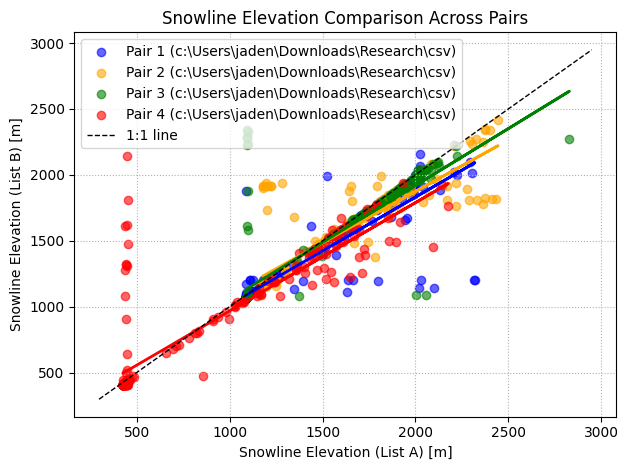

In [46]:
csv_pairs = list(zip(c_csvs, u_csvs))

for i, (csv1, csv2) in enumerate(csv_pairs):
    df1 = pd.read_csv(csv1, index_col=0, parse_dates=True)
    df2 = pd.read_csv(csv2, index_col=0, parse_dates=True)

    # Align and clean data
    merged = pd.DataFrame({
        "x": df1["snowline_elev_m"],
        "y": df2["snowline_elev_m"]
    }).dropna()

    x = merged["x"].values
    y = merged["y"].values

    colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']
    # Scatter points
    plt.scatter(x, y, alpha=0.6, color=colors[i % len(colors)],
                label=f"Pair {i+1} ({csv1.split('_')[0]})")

    # Trendline
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, color=colors[i % len(colors)], linewidth=2)

# Add 1:1 reference line
lims = [plt.xlim(), plt.ylim()]
minlim = min(lims[0][0], lims[1][0])
maxlim = max(lims[0][1], lims[1][1])
plt.plot([minlim, maxlim], [minlim, maxlim], 'k--', linewidth=1, label="1:1 line")

plt.xlabel("Snowline Elevation (List A) [m]")
plt.ylabel("Snowline Elevation (List B) [m]")
plt.title("Snowline Elevation Comparison Across Pairs")
plt.legend()
plt.grid(True, linestyle=":")
plt.tight_layout()
plt.show()


Melt Extent Comparison:

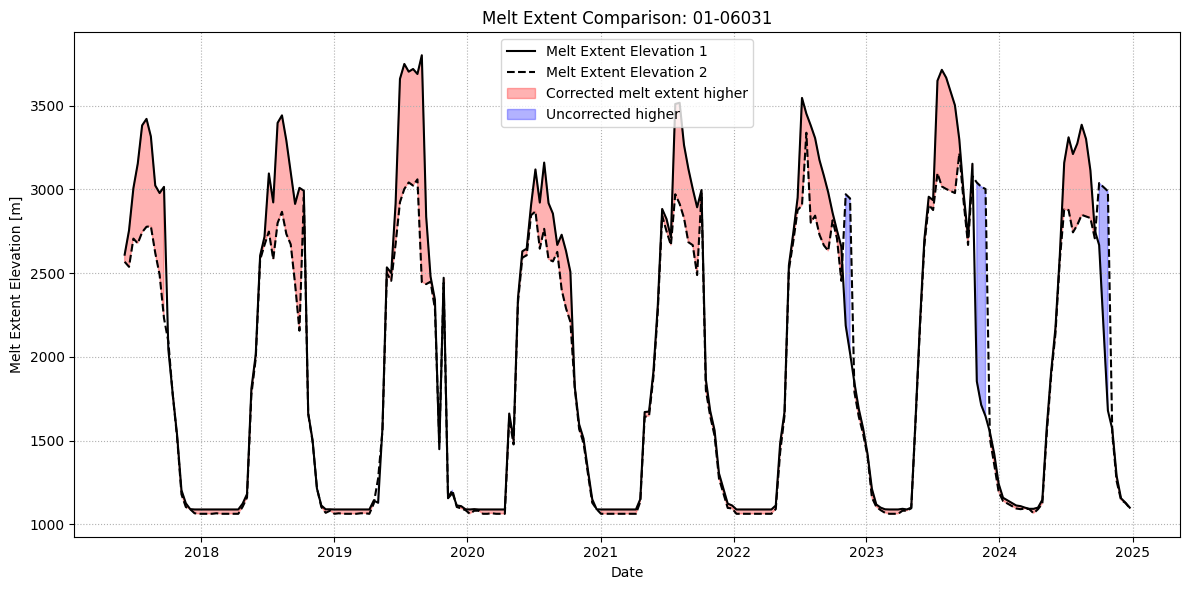

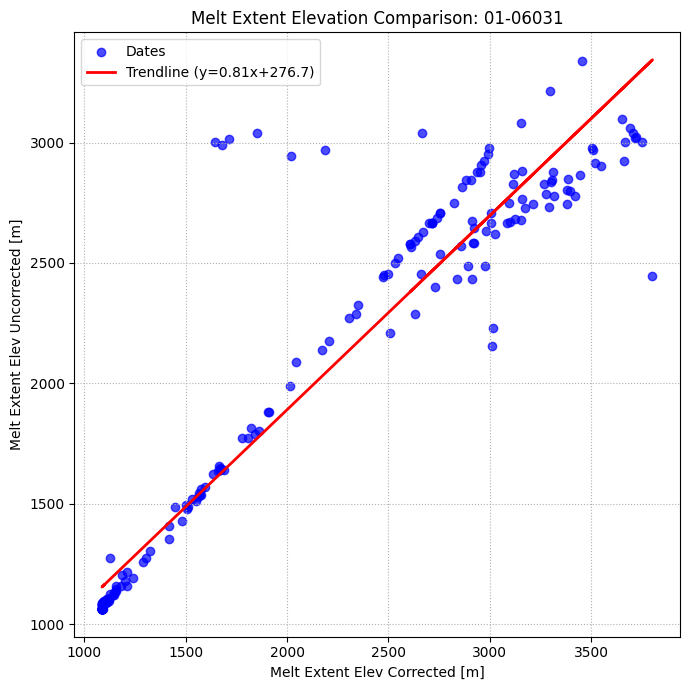

In [98]:
csv_1 = u_glac_me_elev_perc_z_fps[0]
csv_2 = [x for x in corr_glac_me_elev_perc_z_fps if pf in x and "eos" not in x][0]
csv_2

corr_me_df = pd.read_csv(csv_2, index_col=0, parse_dates=True)
u_me_df = pd.read_csv(csv_1, index_col=0, parse_dates=True)

# Shape (rows, columns)
# print("Shapes:", corr_sl_df.shape, u_sl_df.shape)

# Column headers
# print("Headers:", corr_sl_df.columns.tolist())

# Merge on dates (inner join ensures only matching dates)
merged = corr_me_df[['melt_extent_elev_m']].rename(columns={'melt_extent_elev_m': 'me1'})
merged['me2'] = u_me_df['melt_extent_elev_m']

# Compute difference
merged['diff'] = merged['me1'] - merged['me2']

# Plot
plt.figure(figsize=(12,6))

# black straight lines (no dots)
plt.plot(merged.index, merged['me1'], color="black", linewidth=1.5, label="Melt Extent Elevation 1")
plt.plot(merged.index, merged['me2'], color="black", linewidth=1.5, linestyle="--", label="Melt Extent Elevation 2")

# Highlight differences
plt.fill_between(
    merged.index,
    merged['me1'], merged['me2'],
    where=merged['me1'] > merged['me2'],
    color='red', alpha=0.3, label="Corrected melt extent higher"
)
plt.fill_between(
    merged.index,
    merged['me1'], merged['me2'],
    where=merged['me1'] < merged['me2'],
    color='blue', alpha=0.3, label="Uncorrected higher"
)

plt.xlabel("Date")
plt.ylabel("Melt Extent Elevation [m]")
plt.title(f"Melt Extent Comparison: {rgi_id}")
plt.legend()
plt.grid(True, linestyle=":")
plt.tight_layout()
png_fp = os.path.join(fig_fp, f"me_cmp_{rgi_id}.png")
plt.savefig(png_fp, dpi=300, bbox_inches='tight')  # high-quality PNG
plt.show()

#comparison plot
x = merged['me1'].values
y = merged['me2'].values

plt.figure(figsize=(7,7))
plt.scatter(x, y, c='blue', alpha=0.7, label="Dates")

# Add regression (trendline)
m, b = np.polyfit(x, y, 1)   # slope, intercept
plt.plot(x, m*x + b, color="red", linewidth=2, label=f"Trendline (y={m:.2f}x+{b:.1f})")

plt.xlabel("Melt Extent Elev Corrected [m]")
plt.ylabel("Melt Extent Elev Uncorrected [m]")
plt.title(f"Melt Extent Elevation Comparison: {rgi_id}")
plt.legend()
plt.grid(True, linestyle=":")
plt.tight_layout()
png_fp = os.path.join(fig_fp, f"me_dot_cmp_{rgi_id}.png")
plt.savefig(png_fp, dpi=300, bbox_inches='tight')  # high-quality PNG

plt.show()